Saving IMAGE.jpeg to IMAGE.jpeg


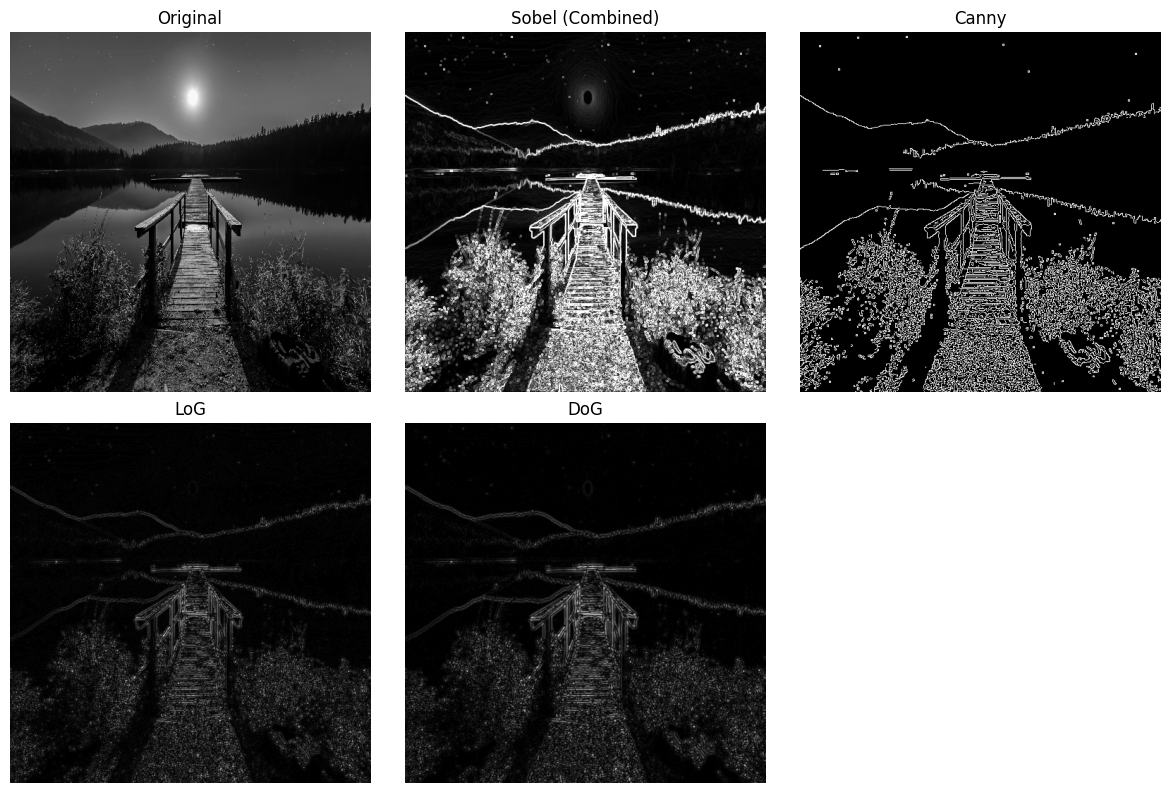

In [1]:
# -----------------------------
# Upload Image
# -----------------------------
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()   # Upload your MRI/X-ray image
filename = list(uploaded.keys())[0]

# -----------------------------
# 1. Load and preprocess image
# -----------------------------
# Load image in grayscale
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Resize for consistency (optional)
image = cv2.resize(image, (512, 512))

# -----------------------------
# 2. Sobel Edge Detection
# -----------------------------
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Normalize to 0-255 for display
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# -----------------------------
# 3. Canny Edge Detection
# -----------------------------
canny_edges = cv2.Canny(image, threshold1=100, threshold2=200)

# -----------------------------
# 4. Laplacian of Gaussian (LoG)
# -----------------------------
# Apply Gaussian Blur first
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
laplacian = cv2.Laplacian(gaussian_blur, cv2.CV_64F)
log_edges = cv2.convertScaleAbs(laplacian)

# -----------------------------
# 5. Difference of Gaussian (DoG)
# -----------------------------
blur1 = cv2.GaussianBlur(image, (5, 5), 0)
blur2 = cv2.GaussianBlur(image, (9, 9), 0)
dog = cv2.absdiff(blur1, blur2)

# -----------------------------
# 6. Visualization
# -----------------------------
titles = ["Original", "Sobel (Combined)", "Canny", "LoG", "DoG"]
images = [image, sobel_combined, canny_edges, log_edges, dog]

plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()
